#### Exercise 1:

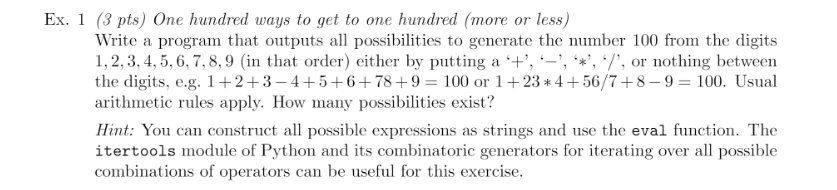

In [1]:
import itertools

operators = ['+',"-",'/','*','']

combinations = itertools.product(operators, repeat=8)

numbers = '123456789'

possibilities = []

for i in combinations:
    p = []

    for ind in range(8):
        p.append(numbers[ind])
        p.append(i[ind])

    p.append(numbers[8])

    if eval(''.join(p)) == 100:
        possibilities.append(p)
        print(''.join(p) + '=' + str(eval(''.join(p))))

len(possibilities)

1+2+3+4+5+6+7+8*9=100
1+2+3-4+5+6+78+9=100
1+2+3-4*5+6*7+8*9=100
1+2+3-45+67+8*9=100
1+2+3*4-5-6+7+89=100
1+2+3*4*5/6+78+9=100.0
1+2+3*4*56/7-8+9=100.0
1+2+34-5+67-8+9=100
1+2+34*5+6-7-8*9=100
1+2-3*4+5*6+7+8*9=100
1+2-3*4-5+6*7+8*9=100
1+2*3+4+5+67+8+9=100
1+2*3+4*5-6+7+8*9=100
1+2*3-4+56/7+89=100.0
1+2*3-4-5+6+7+89=100
1+2*3*4*5/6+7+8*9=100.0
1+2*34-56+78+9=100
1+23-4+5+6+78-9=100
1+23-4+56+7+8+9=100
1+23-4+56/7+8*9=100.0
1+23-4-5+6+7+8*9=100
1+23*4+5-6+7-8+9=100
1+23*4+56/7+8-9=100.0
1+23*4-5+6+7+8-9=100
1+234-56-7-8*9=100
1+234*5/6-7-89=100.0
1+234*5*6/78+9=100.0
1-2+3+45+6+7*8-9=100
1-2+3*4+5+67+8+9=100
1-2+3*4*5+6*7+8-9=100
1-2+3*4*5-6+7*8-9=100
1-2-3+4*5+67+8+9=100
1-2-3+4*56/7+8*9=100.0
1-2-3+45+6*7+8+9=100
1-2-3+45-6+7*8+9=100
1-2-3+45-6-7+8*9=100
1-2-34+56+7+8*9=100
1-2*3+4*5+6+7+8*9=100
1-2*3-4+5*6+7+8*9=100
1-2*3-4-5+6*7+8*9=100
1-23+4*5+6+7+89=100
1-23-4+5*6+7+89=100
1-23-4-5+6*7+89=100
1/2/3*456+7+8+9=100.0
1/2*3/4*56+7+8*9=100.0
1/2*34-5+6-7+89=100.0
1*2+3+4*5+6+78-9=100

101

### Exercise 2:

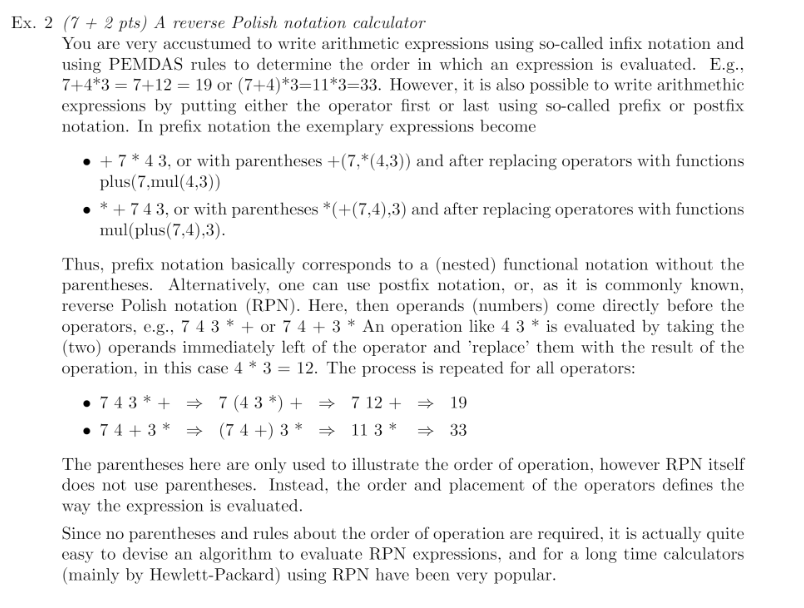
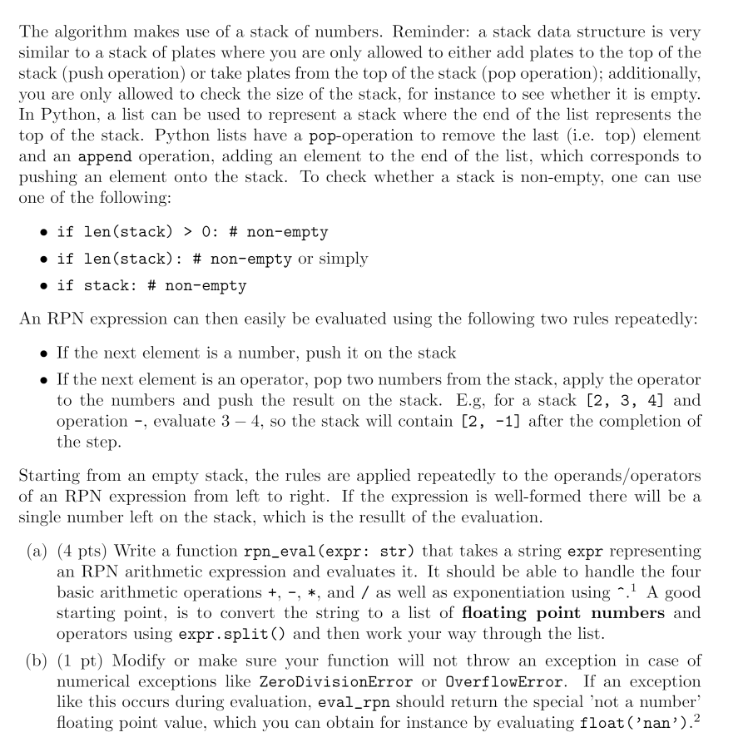

a) and b)

In [16]:
def rpn_eval(expr: str):
    stack = []
    operators = {'+': lambda x, y: x + y,
                 '-': lambda x, y: x - y,
                 '*': lambda x, y: x * y,
                 '/': lambda x, y: x / y,
                 '^': lambda x, y: x ** y}
    
    for token in expr.split():
        if token in operators:
            try:
                operand2 = stack.pop()
                operand1 = stack.pop()
                result = operators[token](operand1, operand2)
                stack.append(result)
            except IndexError:
                return float('nan')  # Not enough operands
            except ZeroDivisionError:
                return float('nan')  # Division by zero
            except OverflowError:
                return float('nan')  # Overflow
        else:
            stack.append(float(token))
    
    if len(stack) == 1:
        return stack[0]
    else:
        return float('nan')  # Malformed expression

# Test
print(rpn_eval("3 4 + 3 ^"))  # Output: 343.0

343.0


In [17]:
rpn_eval('7 4 + 1 /')

11.0

c)

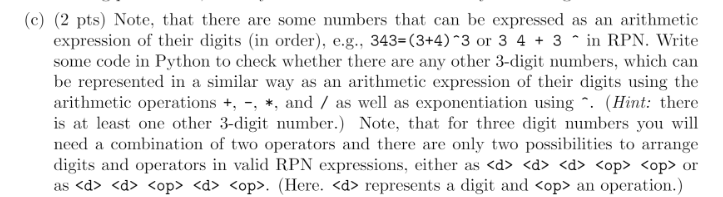

In [33]:
import itertools

def find_expressions():
    
    three_digit_numbers = [str(i) for i in range(100, 1000)]
    valid_numbers = []
    
    for num in three_digit_numbers:
        for ops in itertools.product('+-*/^', repeat=2):
            expr1 = ' '.join([num[0], num[1], num[2], ops[0], ops[1]])
            expr2 = ' '.join([num[0], num[1], ops[0], num[2], ops[1]])

            result1 = rpn_eval(expr1)
            result2 = rpn_eval(expr2)
            
            
            if result1 == float(num):
                valid_numbers.append(expr1)
            elif result2 == float(num):
                valid_numbers.append(expr2)
    
    return valid_numbers

print(find_expressions())


['3 4 + 3 ^', '7 3 6 ^ +']


### Exercise 3:

a) & b)

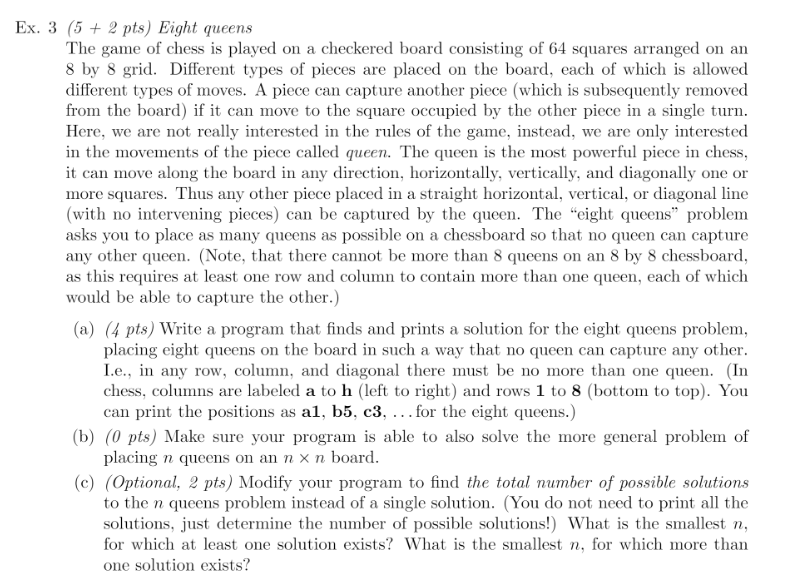

In [34]:
def is_safe(board, row, col):
    # Check if there is a queen in the same column
    for i in range(row):
        if board[i] == col:
            return False

    # Check upper diagonal on left side
    for i, j in zip(range(row-1, -1, -1), range(col-1, -1, -1)):
        if board[i] == j:
            return False

    # Check upper diagonal on right side
    for i, j in zip(range(row-1, -1, -1), range(col+1, len(board))):
        if board[i] == j:
            return False

    return True

def solve_queens(n):
    board = [-1] * n
    solutions = []

    def place_queen(row):
        if row == n:
            solutions.append(board[:])  # Found a solution
            return

        for col in range(n):
            if is_safe(board, row, col):
                board[row] = col
                place_queen(row + 1)
                board[row] = -1  # Backtrack

    place_queen(0)
    return solutions

def print_solution(solution):
    for i in range(len(solution)):
        print(f"{chr(i + ord('a'))}{solution[i] + 1}", end=" ")
    print()

# Print one solution for 8 queens
solutions = solve_queens(8)
if solutions:
    print_solution(solutions[0])
else:
    print("No solution found.")


a1 b5 c8 d6 e3 f7 g2 h4 


(c) To find the total number of possible solutions to the n queens problem:

In [35]:
def count_solutions(n):
    solutions = solve_queens(n)
    return len(solutions)

n = 1
while count_solutions(n) == 0:
    n += 1

print("Smallest n with at least one solution:", n)

n = 1
while count_solutions(n) <= 1:
    n += 1

print("Smallest n with more than one solution:", n)

Smallest n with at least one solution: 1
Smallest n with more than one solution: 4


### Exercise 4:

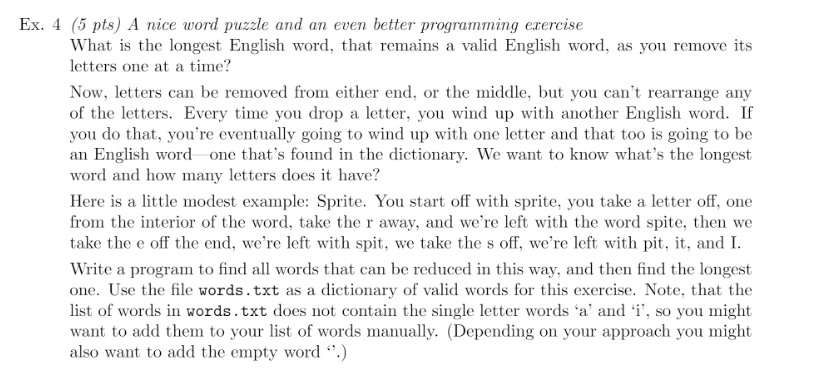

In [39]:
def load_words(filename):
    with open(filename, 'r') as file:
        return set(word.strip() for word in file)

def find_valid_words(words):
    valid_words = set()
    for word in words:
        n = len(word)
        for i in range(n):
            subword = word[:i] + word[i+1:]
            if subword in words:
                valid_words.add(subword)
    return valid_words

def longest_word(words):
    valid_words = find_valid_words(words)
    longest = ""
    for word in valid_words:
        if len(word) > len(longest):
            longest = word
    return longest

# Load dictionary
dictionary = load_words("words.txt")
# Add single-letter words 'a' and 'i'
dictionary.update(['a', 'i'])

# Find and print the longest word
longest = longest_word(dictionary)
print("Longest word:", longest)
print("Length:", len(longest))


Longest word: counterdemonstration
Length: 20
